In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import axes as ax

In [4]:
data = pd.read_csv('data_for_lr.csv')

In [5]:
# Preprocessing and Cleaning the data if needed

In [6]:
data.head(3)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656


In [7]:
data.info() # there seems to be a null-value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
data.isna().sum() # Confirming the same

x    0
y    1
dtype: int64

In [9]:
data = data.dropna() # dropping the null row

In [10]:
data.shape

(699, 2)

In [11]:
data.isna().sum() # Now there is no null value

x    0
y    0
dtype: int64

# Splitting the given data to get a training_set of input and output

In [12]:
training_input = np.array(data.x[0: 500]).reshape(500, 1) # training input is the first 500 x-values as a column vector
training_output = np.array(data.y[0: 500]).reshape(500, 1) # training output is first 500 y-values as a column vector

test_input = np.array(data.x[500:]).reshape(199, 1) # test input is the rest of the x-values as a column vector
test_output= np.array(data.y[500:]).reshape(199, 1) # test output is the rest of y-values as a column vector

In [13]:
print(training_input.shape, training_output.shape, test_input.shape, test_output.shape)

(500, 1) (500, 1) (199, 1) (199, 1)


# <bold> <font color = 'green'> Linear Regression </font></bold>

# Forward Propagation Part

y = f(x) = m * x + c; here m and c are the slope and intercept parameters that get updated as model learns through the training dataset

In [14]:
def forward_propagation(training_input, parameters):
    
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, training_input) + c
    
    return predictions

# Cost Function 

MSE = Cost = 1/2n * (y - f(x))^2 , where y is the actual value and f(x) is the one as predicted by the model

In [15]:
def cost_function(predictions, training_input):
    
    cost = 0.5 * (np.mean(training_output - predictions)**2)
    
    return cost

# Gradient Descent for Backward Propagation

df = sum(f(x) - y)/n = sum(prediction - training_output)/n

dm = df * x = df * training_input

dc = df

Here, df is the mean of (prediction - training_output). Then, delta(Cost)/delta(m) = df * x and delta(Cost)/delta(c) = df

In [16]:
def backward_propagation (training_input, training_output, predictions):
    
    derivatives = dict()
    df = (predictions - training_output)
    dm = np.mean(np.multiply(training_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Updating Parameters

m' = m - learning_rate * dm
c' = c - learning_rate * dc

In [17]:
def update_parameters(learning_rate, derivatives, parameters):
    
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

# Training the Model

1. Forward Propagation 2. Calculate Cost 3. Backward Propagation 4. Update Parameters

In [18]:
# iters is a parameter, which describes how many times to repeat training

def train(training_input, training_output, learning_rate, iters):
    
    # random parameters
    
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)
    
    plt.figure()
    
    loss = list()
    
    # iterating 'iters' number of times
    
    for i in range(iters):
        
        predictions = forward_propagation(training_input, parameters) # Forward propagation
        
        cost = cost_function(predictions, training_input) # Cost function
        
        # done to update loss_list 
        
        loss.append(cost)
        
        print('Iteration = ', i+1, ' loss = ', cost)
        
        # plot the following within each subplot
        
        fig, ax = plt.subplots()
        ax.plot(training_input, training_output, '+', label = 'Original')
        ax.plot(training_input, predictions, '*', label = 'Predicted') 
        
        # include the legend and plot now
        
        legend = ax.legend()
        plt.plot(training_input, training_output, '+')
        plt.plot(training_input, predictions, '*')
        plt.show()
        
        derivatives = backward_propagation(training_input, training_output, predictions) # Backward propagation part
        
        parameters = update_parameters(learning_rate, derivatives, parameters) # Updating the parameters
        
        
    # finally returns the optimal parameters for the training set
        
    return parameters, loss   
    

# Training

Iteration =  1  loss =  91.83612275847828


<Figure size 640x480 with 0 Axes>

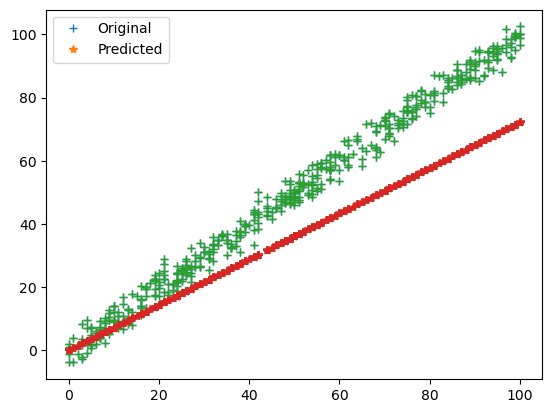

Iteration =  2  loss =  41.4831741596487


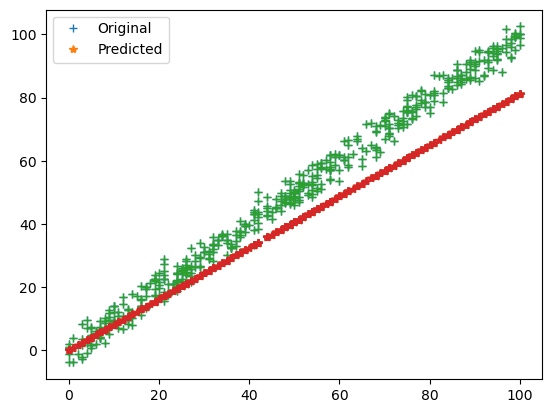

Iteration =  3  loss =  18.69805401895576


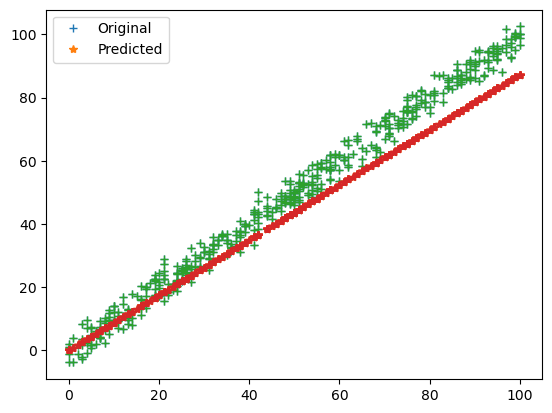

Iteration =  4  loss =  8.400879220785836


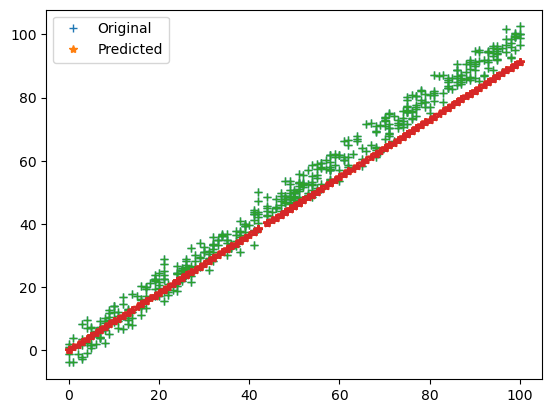

Iteration =  5  loss =  3.7562913129250055


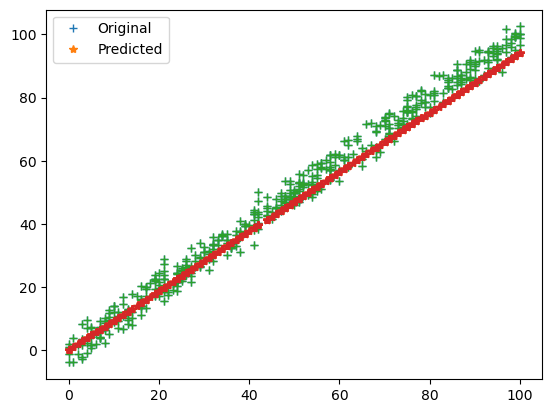

Iteration =  6  loss =  1.6673921776130753


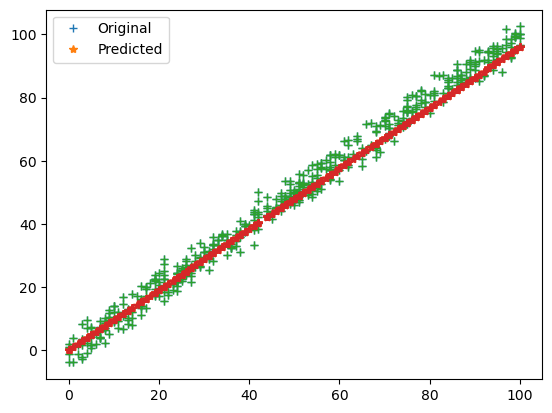

Iteration =  7  loss =  0.7320198030778636


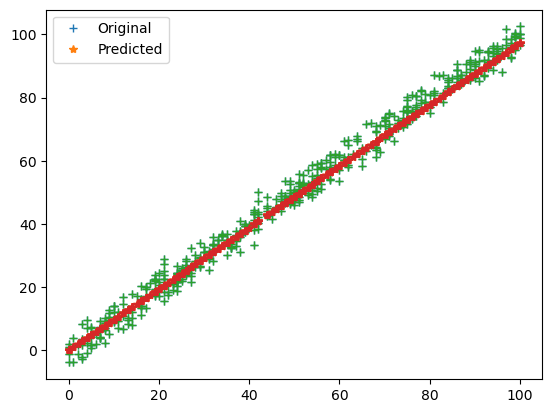

Iteration =  8  loss =  0.3159678029907439


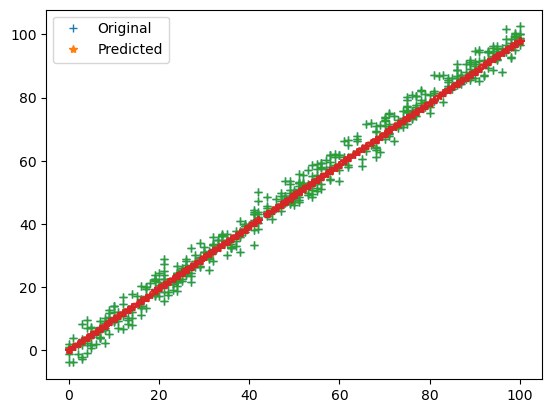

Iteration =  9  loss =  0.1328135619246585


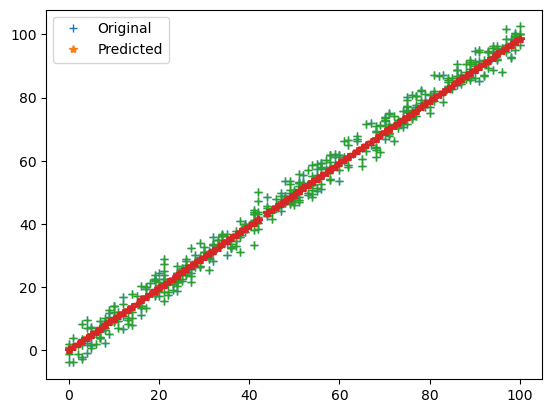

Iteration =  10  loss =  0.0534942491103192


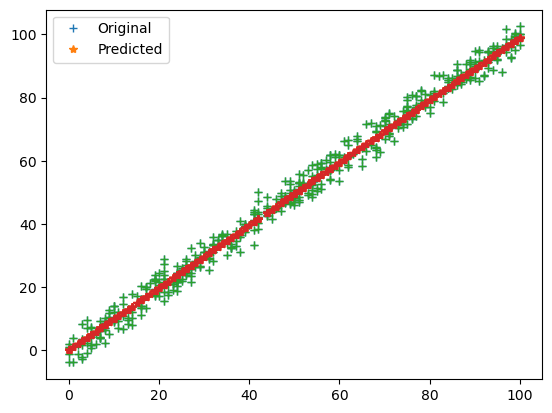

Iteration =  11  loss =  0.020051647496724813


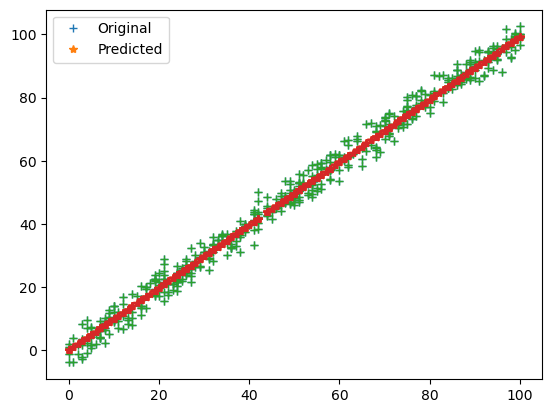

Iteration =  12  loss =  0.00659265618907674


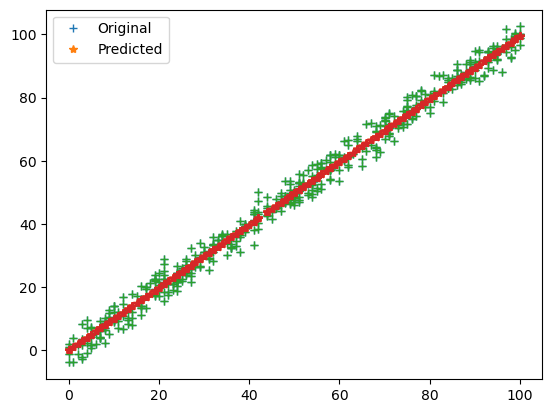

Iteration =  13  loss =  0.0016407247425632332


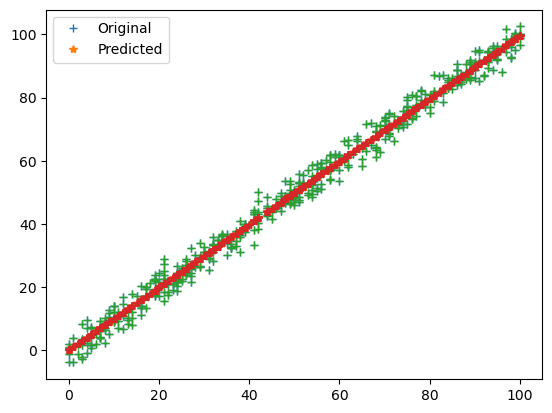

Iteration =  14  loss =  0.00017158326684442996


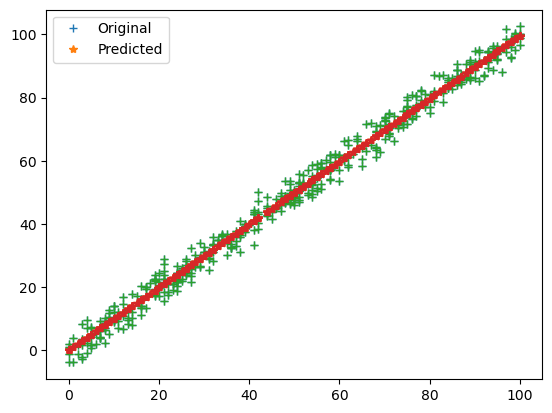

Iteration =  15  loss =  2.8742559484943804e-05


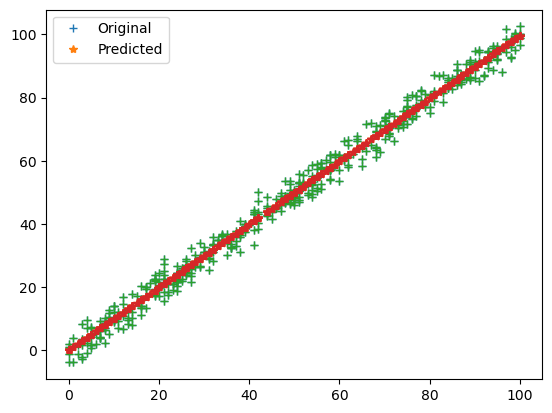

Iteration =  16  loss =  0.0003166671187642406


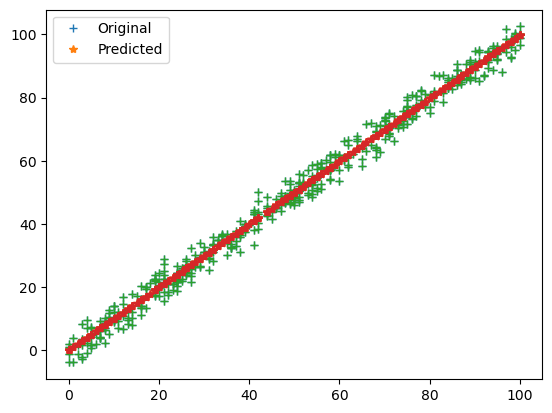

Iteration =  17  loss =  0.0006848664476828887


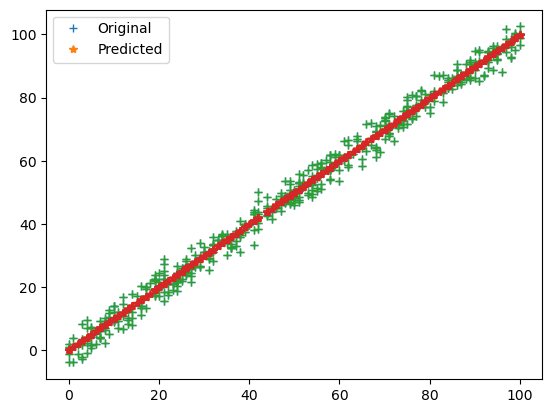

Iteration =  18  loss =  0.0010119171389238728


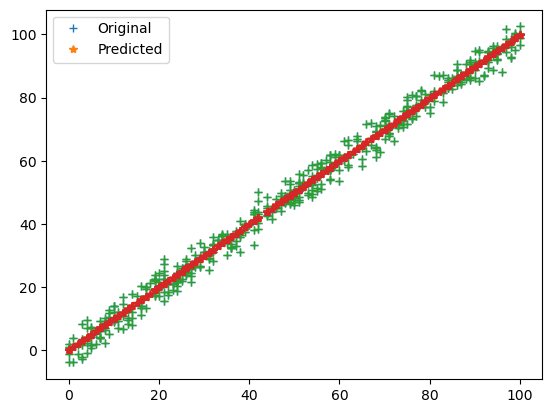

Iteration =  19  loss =  0.0012680512880482884


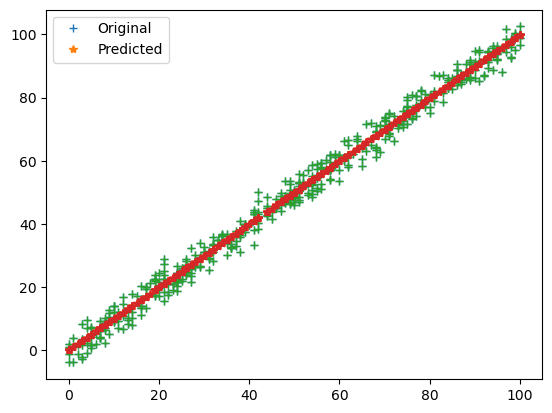

Iteration =  20  loss =  0.001456818979727629


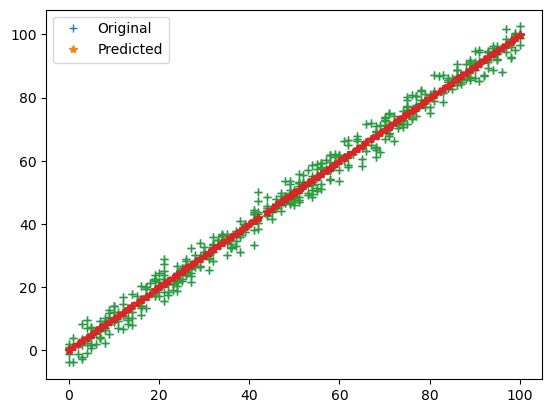

In [19]:
parameters, loss = train(training_input, training_output, 0.0001, 20)

In [20]:
print(parameters)

{'m': 0.9972036293019579, 'c': 0.00792421108367359}


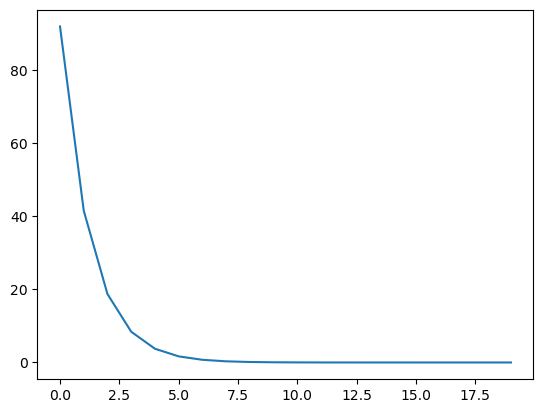

In [21]:
plt.plot(loss)

# Predicting using the model

In [22]:
predicted_output = test_input * parameters['m'] + parameters['c']

# A comparison between actual_output and predicted_output

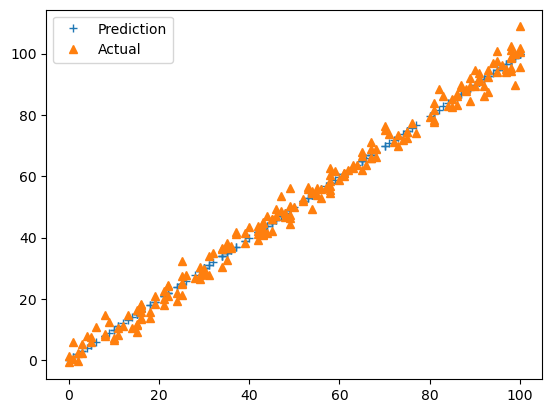

In [23]:
plt.figure()
plt.plot(test_input, predicted_output, "+", label = 'Prediction')
plt.plot(test_input, test_output, "^", label = 'Actual')
plt.legend()
plt.show()

# Mean Square Error for the Prediction

In [24]:
cost_of_prediction = 0.5*np.mean((predicted_output - test_output)**2)

In [25]:
cost_of_prediction

3.9974172693109162